### 1. AIMD/standard TCP

In [32]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

"""
Plot a graph for AIMD Algorithm

Args:
    C (int): Maximum capacity. MD will be applied when x1 + x2 reach this capacity.
    x1 (int): Initial allocation value for x1
    x2 (int): Initial allocation value for x2
    alpha1 (int): Addictive Increase factor for x1
    alpha2 (int): Addictive Increase factor for x2
    beta1 (int): Multiplicative Decrease factor for x1
    beta2 (int): Multiplicative Decrease factor for x2
    output (str): Output filename in svg format. For example, 'aimd.svg'
    title (str): Main title of the output chart. For example, 'Bar Chart'
  """
def aimd_plot(
    C:int,
    x1:int,
    x2:int,
    alpha1:int,
    alpha2:int,
    beta1:int=0.5,
    beta2:int=0.5,
    output:str='output.svg',
    title:str='AIMD Algorithm'
    ):
    iterations = 1

    x1_values = np.empty((0,))
    x2_values = np.empty((0,))

    optimal_x = (C - 0) / (1 - -1)
    optimal_y = -1 * optimal_x + C

    # Store initial values
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)

    while (not(round(x1,2) == optimal_x and round(x2,2) == optimal_y)):
        if iterations == 10000:
            break
        # Loop till x1 and x2 reach the optimal point OR till max iterations

        if (x1 + x2 <= C):
            # Additive Increase
            x1 = x1 + alpha1
            x2 = x2 + alpha1
        else:
            # Multiplicative Decrease
            x1 = x1 * (1 - beta1)
            x2 = x2 * (1 - beta2)

        # Store new values
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)

        iterations += 1

    sendingrate_x1 = sum(x1_values)/iterations
    sendingrate_x2 = sum(x2_values)/iterations
    print('Number of interations to converge: ', iterations)
    print("Final x1:", x1)
    print("Final x2:", x2)

    # Create a line chart
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    plt.style.use("seaborn-v0_8-whitegrid")

    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)

    # Plot Fairness Line where x1 = x2 (Equal distribution)
    fairness_line_x_values = np.linspace(0, C*1.1, C)
    plot1.plot(fairness_line_x_values, fairness_line_x_values, label='Fairness Line', linestyle='dashed', linewidth=1)

    # Plot Efficiency Line where x1 + x2 = C
    efficiency_line_x_values = np.linspace(0, C, C)
    efficiency_line_y_values = C - efficiency_line_x_values
    plot1.plot(efficiency_line_x_values, efficiency_line_y_values, label='Efficiency Line', linestyle='dashed', linewidth=1)

    # Plot the Optimal Point (Intersection)
    plot1.plot(optimal_x, optimal_y, marker='o', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Plot AIMD Algorithm
    plot1.plot(x1_values, x2_values, marker='.', color='black', linewidth=1)

    # Plot x1 and x2 convergent value
    plot1.plot(x1_values[-1], x2_values[-1], marker='.', label=f'$x_{1}$ $x_{2}$ Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})')

    # Add title and labels
    plot1.set_xlabel("Sender 1's Allocation $x_{1}$")
    plot1.set_ylabel("Sender 2's Allocation $x_{2}$")

    # Set limits for x and y axes
    plot1.set_xlim(0, C*1.1)
    plot1.set_ylim(0, C*1.1)

    # Display grid
    plot1.grid(False)
    plot1.legend(loc='upper left', ncol=2)
    plot1.annotate(f'Capacity: {C}\nIterations: {iterations}\nInitial $x_{1}$: {round(x1_values[0])}\nInitial $x_{2}$: {round(x2_values[0])}\n$\\alpha_{1}$: {alpha1}\n$\\alpha_{2}$: {alpha2}\n$\\beta_{1}$: {beta1}\n$\\beta_{2}$: {beta2}', xy=(0.925*C, C/8))

    # Congestion Window plot for x1
    rtt_values = np.linspace(0, iterations, iterations)
    plot2.plot(rtt_values, x1_values, marker=".", color='black', linewidth=1)
    plot2.set_xlabel('Number of Transmissions (RTTs)')
    plot2.set_ylabel('Congestion Window Size')
    plot2.set_title('Congestion Window for $x_{1}$')
    plot2.set_xlim(0, iterations*1.1)
    plot2.annotate(f'Sending Rate $x_{1}$: {sendingrate_x1:.2f} segment / RTT', xy=(iterations/2, C/8))
    plot2.grid(False)

    # Congestion Window plot for x2
    plot3.plot(rtt_values, x2_values, marker=".", color='black', linewidth=1)
    plot3.set_xlabel('Number of Transmissions (RTTs)')
    plot3.set_ylabel('Congestion Window Size')
    plot3.set_title('Congestion Window for $x_{2}$')
    plot3.set_xlim(0, iterations*1.1)
    plot3.annotate(f'Sending Rate $x_{2}$: {sendingrate_x2:.2f} segment / RTT', xy=(iterations/2, C/1.8))
    plot3.grid(False)

    fig.suptitle(title)

    # Show the plot
    plt.savefig(output)
    plt.show()

Number of interations to converge:  10000
Final x1: 235.55026712181566
Final x2: 235.55026712181566


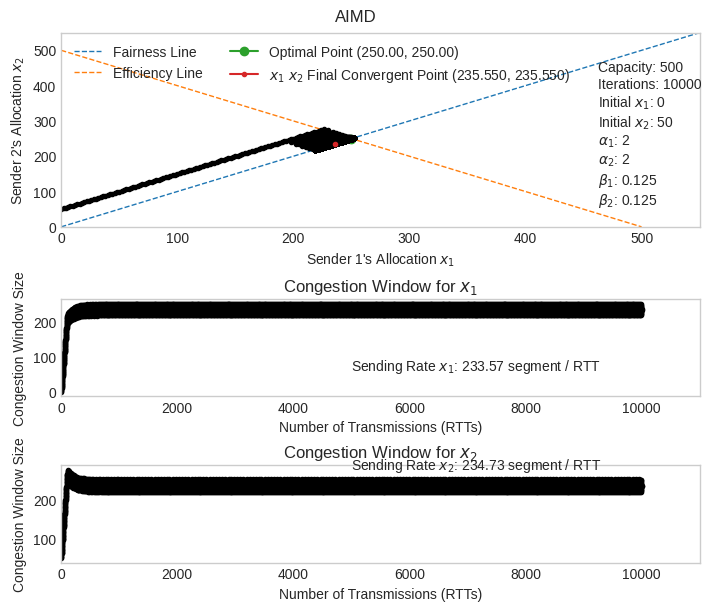

In [33]:
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%Y-%m-%d_%H-%M-%S")

aimd_plot(C=500,
          x1=0,
          x2=50,
          alpha1=2,
          alpha2=2,
          beta1=0.125,
          beta2=0.125,
          output=f"aimd_{formatted_time}.svg",
          title="AIMD"
          )


### 2. MIMD/Scalable TCP

In [34]:
"""
Plot a graph for MIMD Algorithm

Args:
    C (int): Maximum capacity. MD will be applied when x1 + x2 reach this capacity.
    x1 (int): Initial allocation value for x1
    x2 (int): Initial allocation value for x2
    alpha1 (int): Multiplicative Increase factor for x1
    alpha2 (int): Multiplicative Increase factor for x2
    beta1 (int): Multiplicative Decrease factor for x1
    beta2 (int): Multiplicative Decrease factor for x2
    output (str): Output filename in svg format. For example, 'mimd.svg'
    title (str): Main title of the output chart. For example, 'Bar Chart'
"""
def mimd_plot(
    C:int,
    x1:int,
    x2:int,
    alpha1:int,
    alpha2:int,
    beta1:int=0.5,
    beta2:int=0.5,
    output:str='output.svg',
    title:str='MIMD'
    ):
    iterations = 1

    x1_values = np.empty((0,))
    x2_values = np.empty((0,))

    optimal_x = (C - 0) / (1 - -1)
    optimal_y = -1 * optimal_x + C

    # Store initial values
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)

    while (not(round(x1,2) == optimal_x and round(x2,2) == optimal_y)):
        if iterations == 10000:
            break
        # Loop till x1 and x2 reach the optimal point OR till 1000 iterations

        if (x1 + x2 <= C):
            # Yet to reach capacity
            # Multiplicative Increase
            x1 = x1 + (alpha1 * x1)
            x2 = x2 + (alpha2 * x1)
        else:
            # Reach / Over capacity
            # Multiplicative Decrease
            x1 = x1 * (1 - beta1)
            x2 = x2 * (1 - beta2)

        # Store new values
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)

        iterations += 1

    sendingrate_x1 = sum(x1_values)/iterations
    sendingrate_x2 = sum(x2_values)/iterations
    print('Number of interations to converge: ', iterations)
    print("Final x1:", x1)
    print("Final x2:", x2)

    # Create a line chart
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    plt.style.use("seaborn-v0_8-whitegrid")

    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)

    # Plot Fairness Line where x1 = x2 (Equal distribution)
    fairness_line_x_values = np.linspace(0, C*1.1, C)
    plot1.plot(fairness_line_x_values, fairness_line_x_values, label='Fairness Line', linestyle='dashed', linewidth=1)

    # Plot Efficiency Line where x1 + x2 = C
    efficiency_line_x_values = np.linspace(0, C, C)
    efficiency_line_y_values = C - efficiency_line_x_values
    plot1.plot(efficiency_line_x_values, efficiency_line_y_values, label='Efficiency Line', linestyle='dashed', linewidth=1)

    # Plot the Optimal Point (Intersection)
    plot1.plot(optimal_x, optimal_y, marker='o', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Plot AIMD Algorithm
    plot1.plot(x1_values, x2_values, marker='.', color='black', linewidth=1)

    # Plot x1 and x2 convergent value
    plot1.plot(x1_values[-1], x2_values[-1], marker='.', label=f'$x_{1}$ $x_{2}$ Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})')

    # Add title and labels
    plot1.set_xlabel("User 1's Allocation $x_{1}$")
    plot1.set_ylabel("User 2's Allocation $x_{2}$")

    # Set limits for x and y axes
    plot1.set_xlim(0, C*1.1)
    plot1.set_ylim(0, C*1.1)

    # Display grid
    plot1.grid(False)
    plot1.legend(loc='upper left', ncol=2)
    plot1.annotate(f'Capacity: {C}\nIterations: {iterations}\nInitial $x_{1}$: {round(x1_values[0])}\nInitial $x_{2}$: {round(x2_values[0])}\n$\\alpha_{1}$: {alpha1}\n$\\alpha_{2}$: {alpha2}\n$\\beta_{1}$: {beta1}\n$\\beta_{2}$: {beta2}', xy=(0.925*C, C/8))

    # Congestion Window plot for x1
    rtt_values = np.linspace(0, iterations, iterations)
    plot2.plot(rtt_values, x1_values, marker=".", color='black', linewidth=1)
    plot2.set_xlabel('Number of Transmissions (RTTs)')
    plot2.set_ylabel('Congestion Window Size')
    plot2.set_title('Congestion Window for $x_{1}$')
    plot2.set_xlim(0, iterations*1.1)
    plot2.annotate(f'Sending Rate $x_{1}$: {sendingrate_x1:.2f} segment / RTT', xy=(iterations/2, C/8))
    plot2.grid(False)

    # Congestion Window plot for x2
    plot3.plot(rtt_values, x2_values, marker=".", color='black', linewidth=1)
    plot3.set_xlabel('Number of Transmissions (RTTs)')
    plot3.set_ylabel('Congestion Window Size')
    plot3.set_title('Congestion Window for $x_{2}$')
    plot3.set_xlim(0, iterations*1.1)
    plot3.annotate(f'Sending Rate $x_{2}$: {sendingrate_x2:.2f} segment / RTT', xy=(iterations/2, C/4))
    plot3.grid(False)

    fig.suptitle(title)

    # Show the plot
    plt.savefig(output)
    plt.show()

Number of interations to converge:  10000
Final x1: 241.91051525766323
Final x2: 244.32962041023987


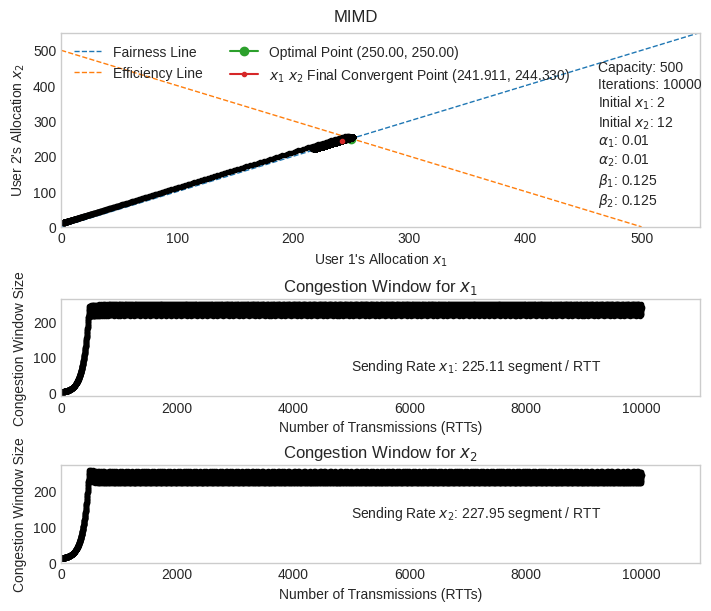

In [35]:
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%Y-%m-%d_%H-%M-%S")

mimd_plot(C=500,
          x1=2,
          x2=12,
          alpha1=0.01,
          alpha2=0.01,
          beta1=0.125,
          beta2=0.125,
          output=f"mimd_{formatted_time}.svg",
          title="MIMD"
          )


## 3. TCP CUBIC

In [49]:
def cubic_plot(
    C:int,
    x1:int,
    x2:int,
    beta1:float=0.7,
    beta2:float=0.7,
    cubic_scaling:float=0.4,  # CUBIC scaling factor C
    output:str='output.svg',
    title:str='TCP CUBIC'
    ):
    iterations = 1

    x1_values = np.empty((0,))
    x2_values = np.empty((0,))

    optimal_x = (C - 0) / (1 - -1)
    optimal_y = -1 * optimal_x + C

    # Store W_max for cubic function (initialized to 0 to trigger slow start)
    W_max1 = 0
    W_max2 = 0

    # Store time since last congestion event
    t1 = 0
    t2 = 0

    # K values (time to grow to W_max)
    K1 = 0
    K2 = 0

    # Store initial values
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)

    while (not(round(x1,2) == optimal_x and round(x2,2) == optimal_y)):
        if iterations == 1000:
            break
        # Loop till x1 and x2 reach the optimal point OR till 1000 iterations

        if (x1 + x2 <= C):
            # Yet to reach capacity - Apply CUBIC growth function

            # Update for user 1
            if W_max1 > 0:
                # CUBIC window growth: W(t) = C*(t-K)^3 + W_max
                x1_new = cubic_scaling * ((t1 - K1) ** 3) + W_max1
                x1 = max(x1, x1_new)  # CUBIC never decreases during congestion avoidance
            else:
                # Initial slow start (before first congestion)
                x1 = x1 * 2

            # Update for user 2
            if W_max2 > 0:
                x2_new = cubic_scaling * ((t2 - K2) ** 3) + W_max2
                x2 = max(x2, x2_new)
            else:
                # Initial slow start
                x2 = x2 * 2

            # Increment time since last congestion
            t1 += 1
            t2 += 1

        else:
            # Reached/exceeded capacity - Multiplicative Decrease

            # Store current window as W_max before reduction
            W_max1 = x1
            W_max2 = x2

            # CUBIC reduces window by a factor of beta (typically 0.7)
            x1 = x1 * beta1
            x2 = x2 * beta2

            # Calculate K values - the time it would take to grow back to W_max
            # K = cubic_root(W_max*(1-beta)/C)
            K1 = np.cbrt(W_max1 * (1-beta1) / cubic_scaling)
            K2 = np.cbrt(W_max2 * (1-beta2) / cubic_scaling)

            # Reset time since last congestion
            t1 = 0
            t2 = 0

        # Store new values
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)

        iterations += 1

    sendingrate_x1 = sum(x1_values)/iterations
    sendingrate_x2 = sum(x2_values)/iterations
    print('Number of iterations to converge: ', iterations)
    print("Final x1:", x1)
    print("Final x2:", x2)

    # Create a line chart
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    plt.style.use("seaborn-v0_8-whitegrid")

    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)

    # Plot Fairness Line where x1 = x2 (Equal distribution)
    fairness_line_x_values = np.linspace(0, C*1.1, 100)
    plot1.plot(fairness_line_x_values, fairness_line_x_values, label='Fairness Line', linestyle='dashed', linewidth=1)

    # Plot Efficiency Line where x1 + x2 = C
    efficiency_line_x_values = np.linspace(0, C, 100)
    efficiency_line_y_values = C - efficiency_line_x_values
    plot1.plot(efficiency_line_x_values, efficiency_line_y_values, label='Efficiency Line', linestyle='dashed', linewidth=1)

    # Plot the Optimal Point (Intersection)
    plot1.plot(optimal_x, optimal_y, marker='o', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Plot CUBIC Algorithm
    plot1.plot(x1_values, x2_values, marker='.', color='black', linewidth=1)

    # Plot x1 and x2 convergent value
    plot1.plot(x1_values[-1], x2_values[-1], marker='.', label=f'$x_{1}$ $x_{2}$ Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})')

    # Add title and labels
    plot1.set_xlabel("User 1's Allocation $x_{1}$")
    plot1.set_ylabel("User 2's Allocation $x_{2}$")

    # Set limits for x and y axes
    plot1.set_xlim(0, C*1.1)
    plot1.set_ylim(0, C*1.1)

    # Display grid
    plot1.grid(False)
    plot1.legend(loc='upper left', ncol=2)

    # Calculate final K values for annotation
    final_K1 = np.cbrt(W_max1 * (1-beta1) / cubic_scaling) if W_max1 > 0 else 0
    final_K2 = np.cbrt(W_max2 * (beta2) / cubic_scaling) if W_max2 > 0 else 0

    plot1.annotate(f'Capacity: {C}\nIterations: {iterations}\nInitial $x_{1}$: {round(x1_values[0])}\nInitial $x_{2}$: {round(x2_values[0])}\n$\\beta_{1}$: {beta1}\n$\\beta_{2}$: {beta2}\nFinal $K_{1}$: {final_K1:.2f}\nFinal $K_{2}$: {final_K2:.2f}\nCUBIC scale: {cubic_scaling}', xy=(0.925*C, C/8))

    # Congestion Window plot for x1
    rtt_values = np.linspace(0, iterations, iterations)
    plot2.plot(rtt_values, x1_values, marker=".", color='black', linewidth=1)
    plot2.set_xlabel('Number of Transmissions (RTTs)')
    plot2.set_ylabel('Congestion Window Size')
    plot2.set_title('Congestion Window for $x_{1}$')
    plot2.set_xlim(0, iterations*1.1)
    plot2.annotate(f'Sending Rate $x_{1}$: {sendingrate_x1:.2f} segment / RTT', xy=(iterations/2, C/8))
    plot2.grid(False)

    # Congestion Window plot for x2
    plot3.plot(rtt_values, x2_values, marker=".", color='black', linewidth=1)
    plot3.set_xlabel('Number of Transmissions (RTTs)')
    plot3.set_ylabel('Congestion Window Size')
    plot3.set_title('Congestion Window for $x_{2}$')
    plot3.set_xlim(0, iterations*1.1)
    plot3.annotate(f'Sending Rate $x_{2}$: {sendingrate_x2:.2f} segment / RTT', xy=(iterations/2, C/4))
    plot3.grid(False)

    fig.suptitle(title)

    # Show the plot
    plt.savefig(output)
    plt.show()

Number of iterations to converge:  1000
Final x1: 9.7093766436162
Final x2: 29.338444435478714


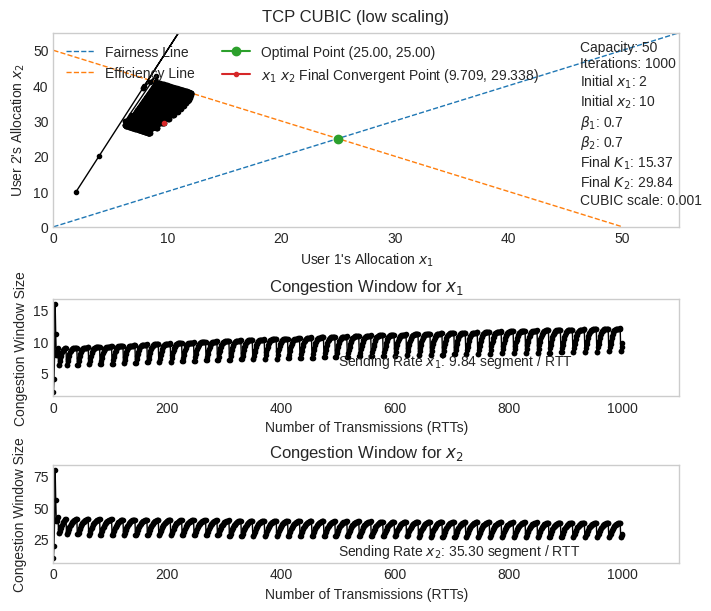

In [50]:
cubic_plot(
    C=50,
    x1=2,
    x2=10,
    beta1=0.7,           # Window reduction factor for user 1
    beta2=0.7,           # Window reduction factor for user 2
    cubic_scaling=0.001,   # CUBIC scaling factor C
    output='tcp_cubic_plot.svg',
    title='TCP CUBIC (low scaling)'
)

Number of iterations to converge:  1000
Final x1: 15.931879819292657
Final x2: 19.15705615585937


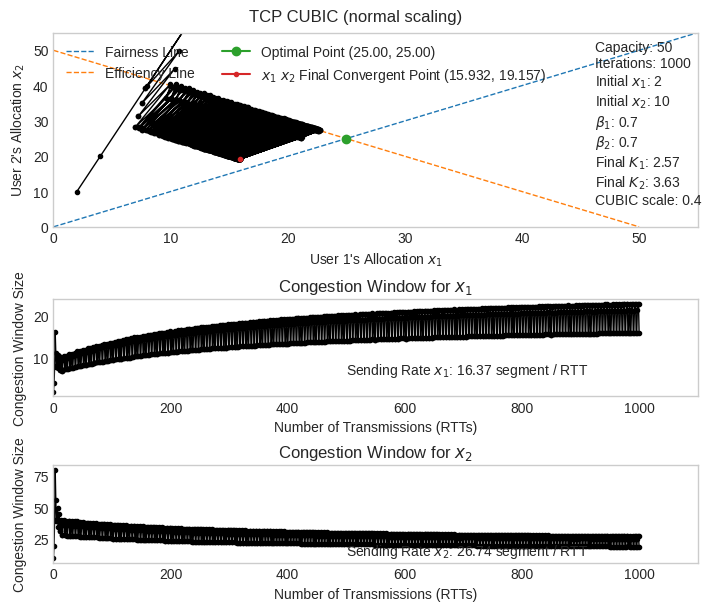

In [53]:
cubic_plot(
    C=50,
    x1=2,
    x2=10,
    beta1=0.7,           # Window reduction factor for user 1
    beta2=0.7,           # Window reduction factor for user 2
    cubic_scaling=0.4,   # CUBIC scaling factor C
    output='tcp_cubic_plot.svg',
    title='TCP CUBIC (normal scaling)'
)